In [3]:
import tensorflow as tf
from tensorflow import keras


In [4]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /Users/smatcha/anaconda3/lib/python3.11/site-packages
Requires: 
Required-by: tensorflow-macos


In [5]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/smatcha/anaconda3/lib/python3.11/site-packages
Requires: tensorflow-macos
Required-by: 


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
print(X_train_full.shape,X_train_full.dtype)

(60000, 28, 28) uint8


In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [10]:
#Validation set with scaling
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
weights,biases=model.layers[1].get_weights()

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 961us/step - loss: 0.7153 - accuracy: 0.7661 - val_loss: 0.5172 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 2s 889us/step - loss: 0.4882 - accuracy: 0.8291 - val_loss: 0.5350 - val_accuracy: 0.8062
Epoch 3/30
1719/1719 [==============================] - 1s 869us/step - loss: 0.4466 - accuracy: 0.8424 - val_loss: 0.4480 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 2s 874us/step - loss: 0.4187 - accuracy: 0.8526 - val_loss: 0.4116 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4010 - accuracy: 0.8596 - val_loss: 0.3845 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 880us/step - loss: 0.3844 - accuracy: 0.8662 - val_loss: 0.3694 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 1s 851us/step - loss: 0.3702 - accuracy: 0.8700 - val_loss: 0.3669 - v

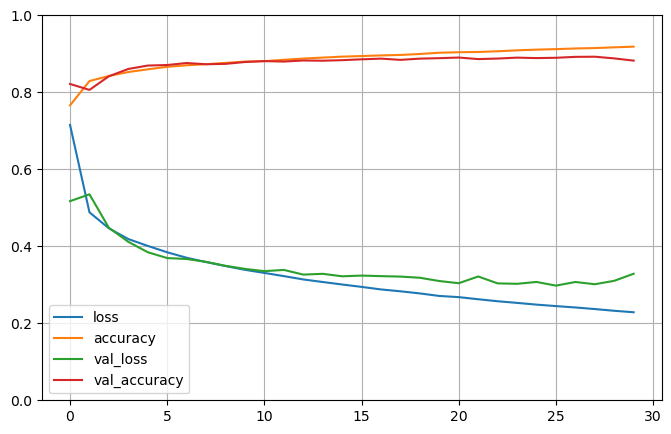

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 536us/step - loss: 1.5301 - val_loss: 0.5916
Epoch 2/20
363/363 [==============================] - 0s 423us/step - loss: 0.5497 - val_loss: 0.4875
Epoch 3/20
363/363 [==============================] - 0s 441us/step - loss: 0.4777 - val_loss: 0.4695
Epoch 4/20
363/363 [==============================] - 0s 431us/step - loss: 0.4425 - val_loss: 0.4757
Epoch 5/20
363/363 [==============================] - 0s 426us/step - loss: 0.4208 - val_loss: 0.6938
Epoch 6/20
363/363 [==============================] - 0s 416us/step - loss: 0.4278 - val_loss: 0.4285
Epoch 7/20
363/363 [==============================] - 0s 410us/step - loss: 0.4151 - val_loss: 0.4279
Epoch 8/20
363/363 [==============================] - 0s 409us/step - loss: 0.4003 - val_loss: 0.4184
Epoch 9/20
363/363 [==============================] - 0s 424us/step - loss: 0.4059 - val_loss: 0.4115
Epoch 10/20
363/363 [==============================] - 0s 415us/step - loss: 0.410

In [36]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])